---
# Jupyter notebook tutorial:
#    Advanced Fitting
                                                
                                                Günter Quast, April 2021                                                
---
## Jupyter Notebook Fundamentals

This file of type `.ipynb` contains a tutorial as a `Jupyter notebook`.
`Jupyter` provides a browser interface with a (simple) development environment for *Python* code
and explanatory texts in intuitive *Markdown* format.
The input of formulas in *LaTeX* format is also supported.

A summary of the most important commands for using *Jupyter* as a working environment can be
found in the notebook
[*JupyterCheatsheet.ipynb*](https://git.scc.kit.edu/yh5078/datenanalyse/-/blob/master/jupyter/JupyterCheatsheet.ipynb)
(German).
Basics for statistical data analysis can be found in the notebooks
[*IntroStatistik.ipynb*](https://git.scc.kit.edu/yh5078/datenanalyse/-/blob/master/jupyter/IntroStatistik.ipynb)
(German) and
[*Fehlerrechnung.ipynb*](https://git.scc.kit.edu/yh5078/datenanalyse/-/blob/master/jupyter/Fehlerrechnung.ipynb) (German).

In *Jupyter*, code and text are entered in individual cells.
Active cells are indicated by a blue bar in the margin.
They can be in two states: in edit mode the input field is white, in command mode it is grayed out.
Clicking in the border area selects the command mode, clicking in the text field of a code cell
switches to edit mode.
The `esc` key can also be used to leave the edit mode.

Pressing `a` in command mode creates a new empty cell above the active cell, `b` creates one below.
Entering `dd` deletes the corresponding cell.

Cells can be either of the type `Markdown` or `Code`.
Entering `m` in command mode sets the type Markdown, entering `y` selects the type Code.

The cell content is processed - i.e. setting text or executing code - by entering `shift+return`,
or `alt+return` if a new, empty cell should also be created.

The settings mentioned here as well as the insertion, deletion or execution of cells can also be
executed via the pull-down menu at the top.

---



# Section 1: Introduction
***

**Fitting data to models** is a general task in physics. Typically, parameter-dependent models
represent theoretical knowledge, which is confronted with empirical data, i.e. measurements.
Measured data are affected by unavoidable experimental uncertainties, and the question
then is whether there exists a set of model parameters for which the agreement with the
data is acceptable. Speaking in term of statistics, the step of comparing data with
uncertainties to a parameter-dependent model is a hypothesis test. Usually, a quantity
called goodness-of-fit is used to quantify the level of agreement between the data and
the theoretical model, expressed as a p-value, that is the probability to observe a
goodness-of-fit which is worse than the one actually observed.

### Recap: least-squares method 

An example is the value of the sum of least squares, S, at the values of the optimal 
parameters, known as $\chi^2$. The corresponding p-value is the so-called $\chi^2$-probability

> $ p_{\chi^2} = \displaystyle \int_{S_{min}}^\infty \chi^2(x, n_{dof}) {\rm d}x$,

where $S$ ist given by the deviation of the model function $f(x, \vec{p})$, depending on 
parameter values $\vec{p}$ evaluated at positions $x_i$, from the measurements $y_i$ normalised
to the measurement uncertainties $\sigma_i$, 

> $ S = \displaystyle \sum_{i=1}^N \left( \frac{ f(x_i; \vec{p}) - y_i} {\sigma_i} \right)^2\,$ 
<a id='Equ-1.1'> (Equ. 1.1)</a>

$S$ is minimized with respect to the parameter values $\vec{p}$, resulting in an 
optimal parameter set $\vec{p}_0$ and the value S_min$(x_i, y_i, \sigma_i, \vec{p}_0)$ 

If $p_{\chi^2}$ is below a pre-defined level, the hypothesis that the model describes the
data is discarded. If the model is not rejected, the parameter set $\vec{p}_0$ is
accepted as the best-fit set of model parameters. The procedure skeched here is known as
the least-squares method originally proposed by Carl Friedrich Gauß. It is the basis of
many fits in fundamental laboratory courses, and many implementations of this simple
method exist in a variety of tools and libraries. 

The least-squares method can easily extended to cope with correlated uncertainties by
introducing the covariance matrix $V$ of the measurement uncertainties:

> $S\left( \vec{y},V f(\vec x, \vec p) \right) = 
\left( \vec{y} - \vec{f}(\vec{x},\vec{p} )\right)^T 
\,  {\bf V^{-1}} 
\left( \vec{y} - \vec{f}(\vec{x},\vec{p} )\right)\, $ 
  <a id='Equ-1.2'> (Equ. 1.2)</a>    

The covariance matrix of the parameter uncertainties can be determined by
evaluating the second derivatives of $S$ at the minimum:

> $\displaystyle{\left( {{\bf V}_\hat{p}}^{-1} \right)_{ij} 
   = \frac{1}{2}\,\left.\frac{\partial^2 S(\vec{p})}{\partial p_i\partial p_j}
   \right|_{\hat{p_i}\hat{p_j}}}$
   <a id='Equ-1.3'> (Equ. 1.3)</a>

Many of the wide-spread tools provide an implementaion, e.g. the easy-to-use function 
`curve-fit` in the `scipy.optimize` package.


### 1.1 More complex use cases 

However, there are more complex use cases. Uncertainties on the abscissa values in 
addition to uncertainties on the ordinate can be implemented by transforming 
variations on the abscissa to variations on the ordinate by means of a first-order 
Taylor expansion.
There are not many tools providing such functionality, among them the package ODR
(orthogonal distance regression) in `scipy`, the Method `TGraphErrors` in the
CERN root package. Correlated uncertainties on the abscissa are, however, not treated
by these packages. 

Another complication consists in relative uncertainties, which are quite common in 
physics. A prominent example are calibration uncertainties of measurement devices,
which lead to correlated, relative uncertainties of all measurements taken with
the same device.  Another common example are approximations of Poisson uncertainties
by a Gaussian distribution by taking the square root of the mean as the uncertainty,
\sigma = \sqrt{\mu}. Such relative uncertainties should be related to the true and 
not to the measured values in order to avoid biases. In doing so, the
standard version of the least-squares method is no longer strictly valid, as the
normalisation term of the Gaussian distribution becomes dependent on the parameters
and can no longer be neglected. In this case, a fit based on the full likelihood 
of all involved uncertainties must be used, as will be explained below.

To the author's knowledge, presently only the tool 
[*kafe2*](https://github.com/dsavoiu/kafe2) developed at KIT provides
the means to simultaneously handle all of the use cases and error types
mentioned above. 
The package [*PhyPraKit.phyFit*](https://phyprakit.readthedocs.io/en/latest/),
also provides a light-weight, transparent layer implementing the required 
precedures on top of the function minimization and uncertainty analyis tool
[*iminuit*](https://iminuit.readthedocs.io/en/stable/).
Many of the examples described below will therefore use the 
*kafe2* or *phyFit* packages.

### 1.2 Prerequisites and other tutorials

The following material assumes familiarity with the basic principles of statistical
data analysis and applications of the least-squares method, as explained in other
jupyter tutorial of this series:

> 1. Introduction to Jupyter notebooks: JupyterCheatsheet.ipynb
  2. Introduction to  Python : PythonIntro.ipynb
  3. Cheat-sheet for Python : PythonCheatsheet.ipynb
  4. Basics of matplotlib : matplotlibTutorial.ipynb
  5. Basics of Statistics: IntroStatistik.ipynb
  6. Error analysis in laboratory courses: Fehlerrechnung.ipynb
  7. Introduction to kafe2: kafe2Tutorial.ipynb




### 1.3 General settings for `kafe2`

In [ ]:
from __future__ import division, print_function  # python2-compatibility
import sys, os

# Lines with % or %% at the beginning are so-called "magic commands",
# that specify the cell type or options for displaying graphics.
%matplotlib inline

#### Imports and Presets for *kafe2*:

In [2]:
from kafe2 import config, XYContainer, Fit, Plot

import numpy as np, matplotlib.pyplot as plt


### 1.4 A simple fit example

To start, a simple, very general example may serve as an introduction to the usage of *kafe2*.
The following, well-documented piece of code is a complete python script performing a fit of 
a quadratic function to data with errors in y-direction. 

Run the following cell by activating it via clicking, then type `shift+return`: 

In [ ]:
''' general example for fitting with kafe2
      - set-up arrays for data
      - perform fit (2nd order polynomial)
      - show and save output
'''
# Imports  #
from kafe2 import XYContainer, Fit, Plot
import numpy as np, matplotlib.pyplot as plt

### define the model function
def poly2(x, a=1.0, b=0.0, c=0.0):
    return a * x**2 + b * x + c

### Workflow #
# 1. the data
x, y, e = ( [0.05,0.36,0.68,0.80,1.09,1.46,1.71,1.83,2.44,2.09,3.72,4.36,4.60],
            [0.35,0.26,0.52,0.44,0.48,0.55,0.66,0.48,0.75,0.70,0.75,0.80,0.90],
            [0.06,0.07,0.05,0.05,0.07,0.07,0.09,0.10,0.11,0.10,0.11,0.12,0.10] ) 
                     
# 2.  convert to kafe2 data structure and add uncertainties
xy_data = XYContainer(x, y)
xy_data.add_error('y', e)                    # independent erros y
# --  set meaningful names 
xy_data.label = 'Beispieldaten'
xy_data.axis_labels = ['x', 'data & f(x)']

# 3. create the Fit object 
my_fit = Fit(xy_data, poly2)
# set meaningful names for model
my_fit.model_label = 'Parabel-Modell'

# 4. perform the fit
my_fit.do_fit()

# 5. report fit results
my_fit.report()

# 6. create and draw plots
my_plot = Plot(my_fit)
my_plot.plot()

# 7. show or save plots #
## plt.savefig('kafe_fitexample.pdf')
plt.show()

The default output shows the data, the best-fit function and the uncertainty band of the model in
graphical form, and text output with names, values and uncertainties of the best-fit values of the parameters as well as the value of $\chi^2$ per degree of freedom and the $\chi^2$-probability of
the fit. 
Customisations of the output, like colors, marker type and size, axis labels are easily possible - 
see the kafe2 documentation and the tutorial *kafe2Tutorial.ipynb*.

### 1.5 A more complex *kafe2* example: comparing two models

One of the strengths of *kafe2* is its ability to handle various kinds of errors and multiple fits
to the same data set, which are ideally suited to compare different model assumptions. An example, 
taken from the *kafe2* jupyter tutorial, is shown in the code cell below. Compared to the previous
example, errors in the x-direction are added, and two models are defined and fit to the data.

In [ ]:
# Comparison of two models with kafe2
# -> insert code here

# Our first model is a simple linear function:
def linear_model(x, a, b):
    return a * x + b

# Our second model is a simple exponential function.
# The kwargs in the function header specify parameter defaults.
def exponential_model(x, A0=1., x0=5.):
    return A0 * np.exp(x/x0)

# The data for this exercise:
x = [19.8, 3.0, 5.1, 16.1, 8.2, 11.7, 6.2, 10.1]
y = [23.2, 3.2, 4.5, 19.9, 7.1, 12.5, 4.5, 7.2]
data2 = XYContainer(x_data=x, y_data=y)
data2.add_error(axis='x', err_val=0.3)
data2.add_error(axis='y', err_val=0.15, relative=True)

data2.label = 'my data points'
data2.axis_labels=['my x values', 'my y values']

# Create 2 Fit objects with the same data but with different model functions:
linear_fit = Fit(data2, model_function=linear_model)
exponential_fit = Fit(data2, model_function=exponential_model)

# Optional: Assign LaTeX strings to parameters and model functions.
linear_fit.assign_parameter_latex_names(a='a', b='b')
linear_fit.assign_model_function_latex_expression("{a}{x} + {b}")
linear_fit.model_label = 'my linear model'
exponential_fit.assign_parameter_latex_names(A0='A_0', x0='x_0')
exponential_fit.assign_model_function_latex_expression("{A0} e^{{{x}/{x0}}}")
exponential_fit.model_label = 'my exponential model'

# Perform the fits:
linear_fit.do_fit()
exponential_fit.do_fit()

# Optional: Print out a report on the result of each fit.
linear_fit.report()
exponential_fit.report()

# Optional: Create a plot of the fit results using Plot.
p = Plot(fit_objects=[linear_fit, exponential_fit], separate_figures=False)
p.plot(fit_info=True)

# Show the fit results:
plt.show()


Examining the graphical output, ist is clear that the linear model only marginally describes the data.
The inspection of the $\chi^2$-probability shows a value of only 5.3%, slightly above the usually chosen
critical value of 5% for rejection of a model. On the other hand, the exponential model fits perfectly.

**Proposed Exercise**:   
You might try to add a quadratic model - you will see that this would also perfectly match the data.

#### 1.6 Examining non-liner models

A further, very useful feature of *kafe2* consists in producing profile scans of $S$ around the minimum and
confidence contours for pairs of parameters. Our second model is non-linear in the sense that one of the
parameters, $x_0$,  enters in a non-linear way. Such problems typically lead to a non-parabolic behaviour
of $S$ as a function of the parameters, and to deviations of the contours corresponding to the one- and 
two- sigma levels from the elliptic form. 

Execute the code in the cell below and study the output. 

In [ ]:
# Checking the nonlinear fits
# -> enter code here

from kafe2 import ContoursProfiler

# Create contour plot and profiles for the exponential fit
cpf = ContoursProfiler(exponential_fit)
cpf.plot_profiles_contours_matrix(show_grid_for='contours')
plt.show()


In this case, the profiles of $\Delta\chi^2 = S(x, y, \vec{p}) - S(x, y, \vec{p_0}$ are 
approximated acceptably well up to $\Delta\chi^2$=1, but show stronger deviations for
larger values. In practice, this means that the values of the parameter uncertainties are
trustworthy, but should not be extrapolated to larger values - i.e. two-times the given
uncertainty does not correspond to the two-sigma level. In case of stronger deviations
another feature of *kafe2* should be used to determine confidence regions for the
values of the fit parameters that are asymmetric around the best-fit values:

```
exponential_fit.report(asymmetric_parameter_errors=True)
```

The method  used to derive such confidence regions relies on the correspondence between $S$ and 
the negative logarithm of the likelihood function for Gaussian uncertainties on the data points
(see explanation below). 


---

# Section 2: Least Squares and Likelihood methods
---

The least-squares method, often also called "$\chi^2$-method", is directly linked to the very general likelihood principle. Like $S$ in the section above, the likelihood $\cal{L}$ is a function of the data, $\vec{x},\vec{y}$, and a model function $f(\vec{x}; \vec{p})$ characterised by a set of parameters $\vec{p}$, i.e. 
$\cal{L}\left(\vec{x}, \vec{y}, f(\vec{x}, \vec{p})\right)$. If the measurements are independent, the likelihood is constructed from the product of the values of the probability density function 
$\cal{D}(\vec{y}, f(\vec{x}, \vec{p}))$ describing the fluctuations of the data $\vec{y}$ around 
the model prediction $f(\vec{x}, \vec{p})$. Very often, owing to the Central Limit Theorem of probability theory, $\cal{D}$ is the Gaussian distribution. In the most general case, the
multivariate Gaussian (or normal) distribution in $d$ dimensions is the appropriate one to use:

> ${\cal{D}}={\cal{N}}\left(\vec{y}, V, f(\vec{x}, \vec{p}) \right) = 
\frac{1} {\sqrt{(2\pi)^{d} \det(V)} } \cdot \exp\left( -\frac{1}{2} (\vec{y}-\vec{\mu})^T V^{-1} (\vec{y}-\vec{\mu}) \right)$
with mean values $\vec{\mu}=\vec{f}\left( \vec{x}, \vec{p} \right)$. (Equ. 2.1)

Instead of the product of likelihood factors, one uses the negative sum of the logarithm of the 
likelihood factors, and the "negative log-likelihood" or "$nl\cal L$" for Gaussian distributed 
data becomes:

>$ -2\, \ln{\cal{L_{\rm Gauß}}}\left( \vec y, V, \vec{f}(\vec x, \vec {p})\right) \,=\,
  \left(\vec y - \vec f(\vec x; \vec p ) \right)^T V^{-1}
  \left(\vec y - \vec f(\vec x; \vec p ) \right)
  + \ln(\det(V)) + n\,\ln(2\pi) \,. $  (Equ. 2.2) 

Minimisation of this function w.r.t. $\vec p$ results in the best estimate of the parameter values 
according to the likelihood principle. It can be shown that this estimation is asymptotically 
optimal and unbiased, i.e. the best among all possible estimators in the sense that is leads to the
smallest variance and vanishing bias of the estimated parameter values in the limit of infinite
sample sizes. These desirable properties already apply for small samples for the exponential 
family of distributions. The covariance matrix of the parameters for an optimal and unbiased
likelihood-estimator is given by

>${V_{ij}}^{-1}={\left. 
\frac {{\partial}^2 \ln{\cal{L}}()}
{\partial p_i \, \partial dp_j} 
\right|}_{\hat p_i \hat p_j}\,$ 
where $\hat p$ indicates the best-fit value of the parameter $p$ (Equ. 2.3).

When minimizing $nl\cal L$, constant terms can be omitted. If the covariance matrix is independent 
of the parameters, i.e. in the absence of relative errors or of errors in the $x$-direction,
$-2 \cdot \ln{\cal{L}}\left(\vec y, V, f(\vec x, \vec p)\right)$ becomes equal to 
$S(\vec{y},V f(\vec x, \vec p)$, the squared sum of redsiduals in Equ. 1.1. 
In other cases, the full likelihood as given in Equ. 2.2 must be used.

The evaluation of the determinant in every step of an iterative numerical optimization is,
however, computationally expensive. On modern computers and thanks to very efficient numerical
libraries this is not a problem at all any more, and therefore still existing simplified, 
less optimal methods should be abandoned in favour of the correct likelihood treatment. 
Usage of the full $nl\cal L$ is the default in the tools *kafe2* and in *phyFit*. 
These packages effectively fall back to the traditional $\chi^2$-method in cases where
it is equivalent, or on explicit user request.

**Note** that sometimes $-2\cdot \ln {\cal{L}}$ ("$n2l\cal L$") is used instead of $nl\cal L$ 
to keep the similarity to the $\chi^2$ method. 

The **goodness-of-fit** is still correctly quantified by 
$\chi^2\left( S(\vec y, V, \vec f(\vec x, \vec{p}_0)), \, n_{dof} \right)$.
This can be justified from the likelihood principle: the best-possible model would describe 
the data perfectly, i.e. all residuals are zero in this case, and the smallest possible value 
of $n2l\cal L$ is $\ln{\det(V)}$. The difference between the observed best-fit value and the
best possible value is therfore exactly $\chi^2(S_{min}, \, n_{dof})$. As we will see below, such
differences in $n2l\cal L$ are used to determine confidence intervals, and even in the general case
$\chi^2$ corresponds to such a $nl\cal L$ difference and therefore is a good measure of the 
goodness-of-fit that can be translated to a $p$-value.


### 2.1 Gaussian likelihood in *kafe2*

As long as the uncertainties are independent of the parameter values, the $nl\cal L$ and $\chi^2$
methods are equivalent, and therefore fits with *kafe2* yield results that are - apart from 
numerical precision - identical to those obtained with other tools. 
The example in the code cell below illustrates the effect by re-using the data of the previous example, but this time adding a relative uncertainty. The two fit results refer to a fit where the relative uncertainties are defined w.r.t. the measured values, or in the other case to the model values. To make the difference in the uncertainties visible, the x-data are shifted by 0.02 in the second fit. The example is a slightly modified version of the one contained in the kafe2 jupyter
tutorial.

In [ ]:
# same linear fit as above, but with relative errors w.r.t. the model values. 

x_1 = np.array(x)-0.02
data2_1 = XYContainer(x_data=x_1, y_data=y)
data2_1.add_error(axis='x', err_val=0.3)
## relative y-errors w.r.t. model are added below, via method of fit class

data2_1.label = 'same data, rel. uncertainties w.r.t. model'

# Create Fit:
linear_fit2_1 = Fit(data2_1, model_function=linear_model)
# --> relative uncertainties with reference to model specified here:
linear_fit2_1.add_error(axis='y', err_val=0.15, relative=True, reference='model')

# Optional: Assign LaTeX strings to parameters and model functions.
linear_fit2_1.assign_parameter_latex_names(x='x', a='a', b='b')
linear_fit2_1.assign_model_function_latex_expression("{a}{x} + {b}")

# Optional: Assign LaTeX strings to parameters and model functions.
linear_fit2_1.assign_parameter_latex_names(a='a', b='b')
linear_fit2_1.assign_model_function_latex_expression("{a}{x} + {b}")
linear_fit2_1.model_label = 'same model, rel. uncertainties w.r.t. model'

# Perform the fit:
linear_fit2_1.do_fit()

# Optional: print report.
#linear_fit2_1.report(asymmetric_parameter_errors=True)

# Optional: Create a plot of the fit results using Plot.
p2_1 = Plot([linear_fit, linear_fit2_1])
# Assign colors to data ...
p2_1.customize('data', 'marker', [(0, 'o'), (1,'o')])
p2_1.customize('data', 'markersize', [(0, 5), (1, 5)])
p2_1.customize('data', 'color', [(0, 'grey'), (1,'red')]) # note: although 2nd label is suppressed
p2_1.customize('data', 'ecolor', [(0, 'grey'), (1, 'red')]) # note: although 2nd label is suppressed
# ... and model.
p2_1.customize('model_line', 'color', [(0, 'mistyrose'),(1, 'orange')])
p2_1.customize('model_error_band', 'label', [(0, r'$\pm 1 \sigma$'),(1, r'$\pm 1 \sigma$')])
p2_1.customize('model_error_band', 'color', [(0, 'mistyrose'),(1, 'orange')])

p2_1.plot(asymmetric_parameter_errors=True)

# Create contour plot and profiles for the linear fit:
cpf2_1 = ContoursProfiler(linear_fit2_1)
cpf2_1.plot_profiles_contours_matrix(show_grid_for='contours')

# Show the fit results.
plt.show()   

There is a significant shift compared to the parameter uncertainties when taking relative uncertainties 
w.r.t. the model values. The reason is obvious, because clearly visibly different uncertainties are assigned 
to the data in the two cases. The profile-likelihood and the contour show that model-dependent uncertainties
introduce some non-parabolic behaviour; even the fit of a linear function is no longer a "linear" problem and
usually numerical methods are needed to find the optimum of $nl\cal L$.

### 2.2 Confidence regions for parameters

All fitting tools implement Equ. 1.3 to determine the covariance matrix describing the parameter
uncertainties. It should be noted that correlations of parameter uncertainties are quite common 
and hard to avoid - and therefore the covariance or correlation matrix of the fit results must
be examined and quoted as part of the results if correlations exceed ~10%.
However, in non-linear cases the description of the conficence regions of the parameter values
by the covariance matrix alone is not sufficient. An example was shown above 
for the exponential model - the scan of the likelihood contour deviated from a parabola, and the
contour plot revealed a non-elliptical behaviour. In such cases Equ. 1.3 does not provide the 
a fully satisfying descritption of the confidence regions of the best-fit parameter values.
In such cases, more advanced methods must be applied. 

The challenge is to estimate valid confidence regions for the fit parameters, taking into 
account parameter inter-dependencies, i.e. general correlations. Reporting confidence regions 
instead of point estimates of parameters with symmetric errors has now become standard in 
science. However, there are not many tools implementing this feature. 

One way out is to use simulated data with fluctuations as  given by the uncertainty model; 
this requires running a large number of fits and hence is computationally expensive, but exact. 
Another approach consists in marginalisation of the multi-dimensional likelihood function by 
integrating out all parameters except one and analysing its marginal distribution. This method 
also is computationally expensive. 

A more favourable method relies on the so-called profile likelihood, which is determined for each 
parameter in turn by varying it around the best-fit value and minimizing the likelihood w.r.t. all
other parameters. The resulting curves are exactly the profile curves that where already shown
in the *kafe2* examples above.
A change in $nl\cal L$ by $+\frac{1}{2}$ corresponds to a range of $\pm 1 \sigma$ around the mean
of a Gaussian distribution, i.e. a confidence region of 68.3%. Since the change in the value of the
likelihood is invariant under parameter transformations, this procedure also works for non-parabolic
(i.e. non-Gaussian) cases. The same method works, with a significantly larger numerical effort, 
for contours in two dimensions, which thus become "confidence contours". 

An efficient implementation of the profile-liklelihood method exists in the minimizer and 
uncertainty-examination tool MINUIT developed at CERN, which is used by *phyFit* and is the 
default option in *kafe2*. 
In *phyFit*, confidence ranges determined by profiling of the likelihood are the default, 
in kafe2 a special parameter is needed in the report function:
>  Fit.report(asymmetric_parameter_errors=True)

### Example: non-linear fit

The code cell below show an extremely non-linear example. In such a case, asymmetric 
uncertainties must be reported as the fit result, and the confidence contours should be 
shown as well. 

In [ ]:
def exponential(x, A0=1, tau=1):
    return A0 * np.exp(-x/tau)

# define the data as simple Python lists
x = [8.0e-01, 2.34e+00, 1.44e+00, 1.28e+00, 2.84e+00, 3.49e+00, 3.78e+00, 4.56e+00, 4.48e+00, 5.38e+00]
xerr = 3.0e-01
y = [4.35e-01, 1.51e-01, 8.1e-02, 1.7e-01, 5.3e-02, 1.98e-02, 2.07e-02, 1.230e-02, 9.7e-03, 2.41e-03]
yerr = [9.3e-02, 4.1e-02, 3.8e-02, 3.9e-02, 3.1e-02, 1.04e-02, 0.95e-02, 0.89e-02, 0.79e-02, 0.20e-02]

# create a fit object from the data arrays
fit = Fit(data=[x, y], model_function=exponential)
fit.add_error(axis='x', err_val=xerr)  # add the x-error to the fit
fit.add_error(axis='y', err_val=yerr)  # add the y-errors to the fit

fit.do_fit()  # perform the fit
fit.report(asymmetric_parameter_errors=True)  # print a report with asymmetric uncertainties

# Optional: create a plot
plot = Plot(fit)
plot.plot(asymmetric_parameter_errors=True, ratio=True)  # add the ratio data/function and asymmetric errors

# Optional: create the contours profiler
cpf = ContoursProfiler(fit)
cpf.plot_profiles_contours_matrix()  # plot the contour profile matrix for all parameters

plt.show()


### 2.3 Practical example with non-trivial covariance matrix: Characteristics of a diode

In many cases the set of uncertainties needed to describe the behaviour of measruements
is not trivial. There may be independent and/or correlated absolute and/or relative
uncertainties in the x- and/or y-direction. Typically, more than one of these eight kinds
of uncertainties are relevant for a given problem, and getting the covariance matrix
right is often not an easy task.  
*kafe2* supports constructing the full covariance matrix with the method 

> ``add_error(err_val, axis=?, name=None, correlation=0, relative=False, reference='data')``,

which allows to specify various kinds of uncertainties for all or for sub-sets of the data
one after the other. The resulting individual covariance matrices are all added to form the 
full covariance matrix used in the fit. This covariance matrix is re-calculated from the
uncertainty components in each minimization step, if needed. 

As an example, consider a typical digital amperemeter or voltmeter. Decive characteristics
are specified as 4000 Counts, +/-(0.5% + 3 digits), where the first, the relative calibration
uncertainty, refers to the true value of the current or voltage and is fully correlated among 
all measurements, while sedond one, the digitisation uncertainty, is independent for each
of the measurements. There often is an additional noise component, which also constitutes a set
of independent uncertainties.

The code in the cell below shows how these uncertainty components for a set of voltage
and current measurements with a diode can be specified for a fit of the Shockley diode
equation. Most of the code is indeed needed to specify the uncertainties, the fit itself
and the ouput of the results are very similar to the examples discussed already.


In [ ]:
'''Fit of Shockley equation to I-U characteristic of a diode
'''

# model function to fit
def Shockley(U, I_s = 0.5, U0 = 0.03):
  """Parametrisation of a diode characteristic

  U0 should be limited such that  U/U0<150 to avoid 
  exceeding the 64 bit floating point range

  Args:
    - U: Voltage (V)
    - I_s: reverse saturation current (nA)
    - U0: thermal voltage (V) * emission coefficient
    
  Returns:
    - float I: diode current (mA)
  """
  return 1E-6 * I_s * np.exp( (U/U0) - 1.)

# measurements:
# voltmeter characteristics: 
#  - voltage, measurement range 2V
voltages = [0.450, 0.470, 0.490, 0.510, 0.530, 
            0.550, 0.560, 0.570, 0.580, 0.590, 0.600, 0.610, 0.620, 0.630,
            0.640, 0.645, 0.650, 0.655, 0.660, 0.665 ]
# - current: 2 measurements in range 200µA, 12 in range 20mA and 6 in range 200mA
currents = [0.056, 0.198, 
            0.284, 0.404, 0.739, 1.739, 1.962, 2.849, 3.265, 5.706, 6.474, 7.866, 11.44, 18.98,
            23.35, 27.96, 38.61, 46.73, 49.78, 57.75]

# create a data container    
diode_data = XYContainer(x_data=voltages, y_data=currents)   
diode_data.label = 'I vs. U '
diode_data.axis_labels=['Voltage (V)', 'Current (mA)']

# --- define uncertainties

#  - precision voltmeter: 4000 Counts, +/-(0.5% + 3 digits)
#     - range 2 V
crel_U = 0.005
Udigits = 3
Urange = 2
Ucounts = 4000
deltaU = Udigits * Urange / Ucounts
# - noise contribution delta U = 0.005 V
deltaU_noise = 0.005 
# add voltage unertainties to data object
diode_data.add_error(axis='x', err_val = deltaU)
diode_data.add_error(axis='x', err_val = deltaU_noise)
# note: relative uncertainties w.r.t. model to be added to fit object later

#  - precision amperemeter: 2000 Counts, +/-(1.0% + 3 digits) 
#     - measurement ranges 200µA, 20mA und 200mA 
crel_I = 0.010
Idigits = 3
Icounts = 2000
Irange1 = 0.2
Irange2 = 20
Irange3 = 200
deltaI= np.asarray(   2 * [Idigits * Irange1 / Icounts] + \
                    12 * [Idigits * Irange2 / Icounts] + \
                     6 * [Idigits * Irange3 / Icounts])  
#  noise contribution delta I = 0.050 mA
deltaI_noise = 0.050
# add current unertainties to data object
diode_data.add_error(axis='y', err_val = deltaI)
diode_data.add_error(axis='y', err_val = deltaI_noise)
# note: relative uncertainties w.r.t. model to be added to fit object
 
# --- start of fit 

# create Fit object
ShockleyFit = Fit(diode_data, model_function=Shockley)
ShockleyFit.model_label = 'Shockley equation'

# add relative errors with reference to model
ShockleyFit.add_error(axis='x', err_val = crel_U, correlation = 1., relative=True, reference='model')
ShockleyFit.add_error(axis='y', err_val = crel_I, correlation = 1., relative=True, reference='model')
# to avoid overflow of 64 bit floats, limit U0
ShockleyFit.limit_parameter('U0', lower= 0.005)

ShockleyFit.do_fit()

# create plot objec
plotShockleyFit = Plot(ShockleyFit)
plotShockleyFit.plot(asymmetric_parameter_errors=True)

plt.show()


---

# Section 3: Fitting Histograms
---

In quantum-, nuclear- and particle-physics measurements typically are rates of detected particles, classified according to energy, scattering angle, life time or others. The resulting data structure
is a freqency spectrum, or a histogram, which shows the number of occurences per interval in the
classifing variable, called a "bin". 

A graphical representation of a typical histogram is created by the code in the  cell below with
the help of *maplotlib*. Also indicated are mean and standard deviation by the marker with error bar,
and quantiles of the distribution by means of a boxplot.

entries per bin [1. 0. 0. 0. 0. 0. 1. 1. 6. 4. 3. 2. 5. 3. 1. 0. 1. 0. 1. 1.]
bin edges [-2.47715587 -2.24547051 -2.01378514 -1.78209978 -1.55041441 -1.31872905
 -1.08704368 -0.85535832 -0.62367295 -0.39198759 -0.16030223  0.07138314
  0.3030685   0.53475387  0.76643923  0.9981246   1.22980996  1.46149533
  1.69318069  1.92486605  2.15655142]


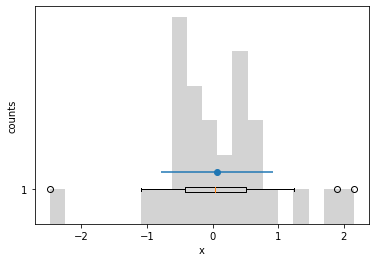

In [3]:
# histogram with matplotlib
np.random.seed(1963539301) # fix random seed (=> same date each time)
x = np.random.randn(30)

mu_x = x.mean()
sig_x = x.std()
bc, be, _ = plt.hist(x, 20, color='lightgrey') 
print("entries per bin", bc)
print("bin edges", be)
plt.xlabel('x')
plt.ylabel('counts')

# show an error bar
plt.errorbar(mu_x, 1.5, xerr = sig_x, fmt='o')

# show a boxplot horizontally with frequence distribution
plt.boxplot(x, vert=False)

plt.show()



### 3.1 Characteristics of histograms and naive fits

The frequencies per bin, or the number of counts per bin, $n_i$ follow a Poisson distribution with expectation value $\lambda_i$ and are (typically) independent of one another:

> $P(n_i;\lambda_i)=\frac{{\lambda_i}^{n_i}} {n_i\,!} \, {\rm e}^{-\lambda_i}$ (Equ. 3.1)

The variances of the Poisson distributions are also given by the parameters $\lambda_i$,
${\sigma_i}^2=\lambda_i$.

In cases of large sample sizes and no bins without entries, very often a Gaussian 
approximation is used, replacing the Poisson distributions by Gaussian distributions
with the same expectation values $\mu_i=\lambda_i$and standard deviations 
$\sigma_i = \sqrt{\lambda_i}$:

> $P(n;\lambda)=\frac{{\lambda}^n}{n\,!}{\rm e}^{-\lambda}$ $\to$ 
$\frac{1}{\sqrt{2\pi\,\mu}} \cdot \exp\left(-\frac{(n-\mu)^2)} {2\mu}\right)$
(Equ. 3.2).

With this substitution, the problem of fitting a probability density to a histogram
becomes identical to the problem of fitting a function to data with Gaussian uncertainties.
As a further simplification, the number of bin entries is taken
as the value of the fitted function evaluated at the bin centre. With a small
number of entries per bin, or, much more severe - for bins with zero entries,
this approach does not work if the uncertainty is taken from the observed number
of entries, $n_i$. Downward fluctuations lead to a smaller assigned uncertainty, 
and hence an increased weight in the fit. The result is a bias towards bins with
downward fluctuations of the observation. Bins with zero entries have to be
omitted in this approach, because data points with zero uncertainty would receive
an infinite weight. A remedy is possible by iterating the fitting
process - in a second fit, the uncertainties taken from the observation can
be replaced by the uncertainties from the model values obtained in the pre-fit.
As you can see, this is not simple at all, and full of risks! Nonetheless, 
lacking other simple tools, this method is quite often used.


The **correct approach** is a fitting procedure using the Poisson likelihood
with the parameter-dependent model prediction $\lambda(\vec p)$ as expectation values:

> ${\cal{L}}_{Poisson}=\displaystyle\prod_{i=1}^N{\rm P}\left(n_i;\lambda_i(\vec p)\right)$ (Equ. 3.3). 

In practice, one again uses the negative logarithm of the likelihood,
> $nl{\cal{L}}_{Poisson}= -\ln {\cal{L}}_{Poisson} =
  \displaystyle\sum_{i=1}^N - n_i \cdot \ln(\mu_i(\vec p))\,+\,\mu_i(\vec p)$
  (Equ. 3.4),

which is minimized w.r.t. the parameters.

Unfortunately, there are not many implementations of this method. An example
is the Class *THistogram* of the *Root* data analysis framework developed at CERN.

*kafe2* and *phyFit*also support fitting a probability distribution function to histogram data,
which, in most standard cases, is as easy as performing a $\chi^2$ fit of a model function 
to data.
 

### 3.2 Example: Histrogram fit with kafe2

*kafe2* contains a dedicated class, *HistFit*, and a data container, *HistContainer*,
to support fits of probability distribution functions to histogram data using 
${\cal{L}}_{Poisson}$ as the cost function in the fit. This method is called
a "binned log-likelihood fit". 



#### 3.2.1 Genearting histogram data

Before starting, we need some data. The code fragment in the cell below generates 
simulated data for a histogram, in this case a typical example of a (Gaussian-shaped) peak on top of a flat background.

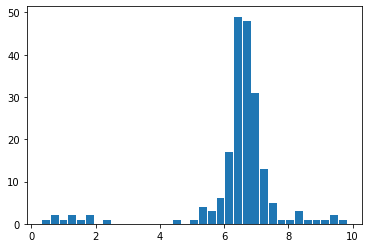

In [4]:
# parameters of data sample, signal and background parameters
N = 200  # number of entries
min=0.   # range of data, mimimum
max= 10. # maximum
s = 0.8  # signal fraction 
pos = 6.66 # signal position
width = 0.33 # signal width

def generate_data(N, min, max, p, w, s):
  '''generate a random dataset: 
     Gaussian signal at position p with width w and signal fraction s 
     on top of a flat background between min and max
   '''
   # signal sample
  data_s = np.random.normal(loc=pos, scale=width, size=int(s*N) )
   # background sample
  data_b = np.random.uniform(low=min, high=max, size=int((1-s)*N) )
  return np.concatenate( (data_s, data_b) )

# generate a histogram data sample
SplusB_data = generate_data(N, min, max, pos, width, s)  

# and show the histogram
bc, be, _ = plt.hist(SplusB_data, bins=35, rwidth =0.9)

#### 3.2.2 Definition of a probability density function (pdf)

The histogram is a finite sample following a probability density function (pdf). 
The pdf for the data generated above is shown in the cell below. 
Note that the pdf must be normalized, e.g. to a total area of one, for all posible 
values of the parameters!

In [6]:
def signal_plus_background(x, mu = 3., sigma = 2., s=0.5):
  '''pdf of a Gaussian signal on top of flat background
  '''
  normal = np.exp(-0.5 * ((x - mu) / sigma) ** 2) / np.sqrt(2.0 * np.pi * sigma ** 2)
  flat = 1./(max-min) 
  return s * normal + (1-s) * flat


#### 3.2.3 Performing the histogram fit with kafe2 using a binned likelihood

Performing the fit with kafe2 is now very easy and follows the scheme already used for 
function fitting. The container for histogram data, HistContainer, produces
a histogram from the input data. This object is passed to an object of the Fit class, 
which needs, of course, the pdf to be fitted to the histogram. 
Performing the fit, reporting the results in text and graphical form  work all
as shown before. 

Execute the code in the cell below to see the result.

#########
# Model #
#########

    Model Function

        signal_plus_background(x; mu, sigma, s)

###############
# Fit Results #
###############

    Model Parameters

        mu = 3.21 +/- 0.27
        sigma = 2.37 +/- 0.13
        s = -0.416 +/- 0.095

    Model Parameter Correlations

               mu      sigma   s     
               ======  ======  ======
        mu     1.0     -1.241  0.3752
        sigma  -1.241  1.0     -1.771
        s      0.3752  -1.771  1.0   

    Cost Function

        Cost function: negative log-likelihood (Poisson uncertainties)

        GoF / ndf = 495.2 / 32 = 15.48



/usr/lib/python3/dist-packages/numpy/lib/nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/usr/lib/python3/dist-packages/numpy/lib/nanfunctions.py:1390: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/tenderbook/.local/lib/python3.8/site-packages/numdifftools/limits.py:150: UserWarning: All-NaN slice encountered
  warnings.warn(str(msg))


AssertionError: 

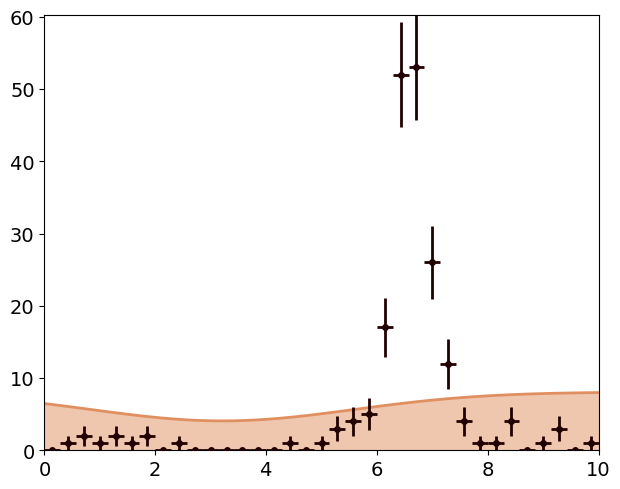

In [7]:
'''Fitting a density distribution to a histogram 
'''
from kafe2 import HistContainer

# Create a histogram from the dataset
SplusB_histogram = HistContainer(n_bins=35, bin_range=(min, max), fill_data = SplusB_data)
# create the Fit object by specifying a density function
hist_fit = Fit(data=SplusB_histogram, model_function=signal_plus_background)

hist_fit.do_fit()  # do the fit
hist_fit.report()  # Optional: print a report to the terminal

# Optional: create a plot and show it
hist_plot = Plot(hist_fit)
hist_plot.plot(asymmetric_parameter_errors=True)
plt.show()


Under the hood, *kafe2* does even more for you than was described above. 
*kafe2* by default uses the negative logarithm of the Poisson likelihood as the cost
function. As stated avove, bins with small nubers of entries or no entries at all do
not pose a problem in this case. 
There are, however, options to change the cost function, which allows you to
define your own cost function.  
By default, the model prediction for the number of entries in each bin is calculated
as the integral of the pdf over the bin. 
The only loss in information compared to an unbinned fit (which we will discuss below),
results from the binning process itself, which may lead to biases if the pdf is varying strongly
over the bin range. Again, options exist to speed-up the fitting procedure by using the value 
of the cost function at the bin centre multiplied by the bin width. 
On modern computers, this should, however, rarely be necessary.

Using a cost function with a Gaussian likelihood or even falling back to a
simple $chi^2$ may be necessary in cases where additional uncertainties, like
uncertainties in the model prediction, need to be added to the Poisson uncertainties.
Often, histogram representations are also used to display quantities other than pure
counting rates, e.g. rates corrected for detector acceptance of inefficiencies,
or normalised rates. In such cases, the default $nl{\cal L}_{Poisson}$ is 
inappropriate as a cost function and must be replaced by a customized one. 


#### 3.2.3 Judging the fit quality

Checking the level of agreement between histogram data and the model requires some
thinking. By constructing a model that perfectly describes the data, given
by a model perfectly agreeing with the observation, $n_i = \lambda_i$ (a so-called
"fully saturated model"), the best-possible value of the Likelihood, 
$nl{\cal{L_0}}_{Poisson}$, can be calculated. The $nl\cal L$-difference between
the acutally obseved value of $nl{\cal{L_0}}_{Poisson}$ can be used in order to define
a reasonable measure for the quality of the fit. This is the same argument we used
when justifying the use of $\chi^2$ for fits with a full Gaussian likelihood. And 
indeed, the measure of goodness-of-fit defined in this way for binned likelihood fits
to histogram data becomes equivalent to $\chi^2$ for infinite sample sizes. In the 
text field of the *kafe2* graph the measure of goodness-of-fit is indicated by the label 
$-2\ln{\cal L}_R/$ndf, to be interpreted in analogy to $\chi^2/$ndf used in case of 
Gaussian fits. 

---

# Section 4: Unbinned likelihood fits 
---

When the sample size is small, representing the data as a histogram may not be appropriate, because the number of
entries per bin could become too small, or the bin widths would have to be increased too much so that binning may 
introduce a bias. In such cases a fit to unbinned data can be performed using the most basic version of the 
Maximum Likelihood estimation.

Given a probability distribution function ${\rm pdf}(\vec x; \vec p)$ for $d$ independent data values $x_i$ 
and the array of parameters $\vec p$, the likelihood is 

> ${\cal L}(\vec x, \vec p) = \displaystyle\prod_{i=1}^d \, {\rm pdf}(x_i, \vec p)$ (Equ. 4.1).

The negative logarithm of this likelihood is

> $nl{\cal L} = -\displaystyle\sum_{i=1}^d \, \ln \left({\rm pdf}(x_i, \vec p)\right)$ (Equ. 4.2).

$nl\cal L$ can be directly used as the cost function and the best set $\vec p_0$ of parameter values can be determined.
Evaluation of parameter uncertainties, profiling of parameters and the extraction of confidence regions for the
parameters all work as previously described. Note that the pdf must be normalised for all values of the parameters!



#### 4.1 Example of an unbinned likelihood fit

We can use the data and pdf of example 3.2 and perform an unbinned fit this time.
*kafe2* offers a special data container, *UnbinnedContainer*, for this purpose.
Everything else in the fitting process is identical. 

Try the code in the cell below.

In [8]:
'''Fitting a density distribution to unbinned data
'''
from kafe2.fit import UnbinnedContainer

unbinned_SplusB = UnbinnedContainer(SplusB_data)  # create the kafe data object

# create the fit object and set the pdf for the fit
unbinned_fit = Fit(data=unbinned_SplusB, model_function=signal_plus_background)

unbinned_fit.do_fit()  # perform the fit

unbinned_plot = Plot(unbinned_fit)  # create a plot object
unbinned_plot.plot(asymmetric_parameter_errors=True)  # plot the data and the fit
plt.show()



/home/tenderbook/.local/lib/python3.8/site-packages/kafe2/fit/unbinned/cost.py:34: RuntimeWarning: invalid value encountered in log
  _total_log_likelihood = np.sum(np.log(model))
/home/tenderbook/.local/lib/python3.8/site-packages/kafe2/fit/unbinned/cost.py:34: RuntimeWarning: invalid value encountered in log
  _total_log_likelihood = np.sum(np.log(model))
/home/tenderbook/.local/lib/python3.8/site-packages/kafe2/fit/unbinned/cost.py:34: RuntimeWarning: invalid value encountered in log
  _total_log_likelihood = np.sum(np.log(model))
/home/tenderbook/.local/lib/python3.8/site-packages/kafe2/fit/unbinned/cost.py:34: RuntimeWarning: invalid value encountered in log
  _total_log_likelihood = np.sum(np.log(model))


LinAlgError: Singular matrix

The result is very similar to the one obtained from the binned liklihood fit. 
The computational effort of an unbinned fit rises with increased number of data
points, while it remains constant for the binned version. For very large data
sets, the unbinned fit may become unmanagable and a binned fit must be used
instead. 

#### 4.2 A more complex example of an unbinned likelihood fit

As another, very typical application we study the case of a life time measurement 
of an elementary particle. The data below stem from a real experiment: the numbers 
are time differences (in µs) between the registration of an incoming muon and 
a second, delayed pulse often caused by an electron from the decay of the stopped muon.
Some delayed pulses are caused by another incoming muon or by noise in the detector.

In [9]:
''' the data for the myon life time example'''
# real data from measurement with a Water Cherenkov detector ("Kamiokanne")
#  numbers represent time differences (in µs) between the passage of a cosmic and
#  the registration of a second pulse, often caused by an electron from the muon decay 
dT = [7.42, 3.773, 5.968, 4.924,  1.468,  4.664,  1.745,  2.144,  3.836,  3.132,
  1.568,  2.352,  2.132,  9.381,  1.484,  1.181,  5.004,  3.06,   4.582,  2.076,
  1.88,   1.337,  3.092,  2.265,  1.208,  2.753,  4.457,  3.499,  8.192,  5.101,
  1.572,  5.152,  4.181,  3.52,   1.344, 10.29,   1.152,  2.348,  2.228,  2.172,
  7.448,  1.108,  4.344,  2.042,  5.088,  1.02,   1.051,  1.987,  1.935,  3.773,
  4.092,  1.628,  1.688,  4.502,  4.687,  6.755,  2.56,   1.208,  2.649,  1.012,
  1.73,   2.164,  1.728,  4.646,  2.916,  1.101,  2.54,   1.02,   1.176,  4.716,
  9.671,  1.692,  9.292, 10.72,   2.164,  2.084,  2.616,  1.584,  5.236,  3.663,
  3.624,  1.051,  1.544,  1.496,  1.883,  1.92,   5.968,  5.89,   2.896,  2.76,
  1.475,  2.644,  3.6,    5.324,  8.361,  3.052,  7.703,  3.83,   1.444,  1.343,
  4.736,  8.7,    6.192,  5.796,  1.4,    3.392,  7.808,  6.344,  1.884,  2.332,
  1.76,   4.344,  2.988,  7.44,   5.804,  9.5,    9.904,  3.196,  3.012,  6.056,
  6.328,  9.064,  3.068,  9.352,  1.936,  1.08,   1.984,  1.792,  9.384, 10.15,
  4.756,  1.52,   3.912,  1.712, 10.57,   5.304,  2.968,  9.632,  7.116, 1.212,
  8.532,  3.000,  4.792,  2.512,  1.352,  2.168,  4.344,  1.316,  1.468, 1.152,
  6.024,  3.272,  4.96,  10.16,   2.14,   2.856, 10.01,   1.232, 2.668, 9.176 ]

The pdf of the problem is shown in the code cell below. Modeled is an exponential 
decay with mean life time *tau* on a flat background. Because the exponential
fuction is only fit to life time values in a restricted range, the required nomalisation
makes the pdf look somewhat complicated.

In [10]:
def lt_pdf(t, tau=2.2, fbg=0.1, a=1., b=9.75):
    """
    Probability density function for the decay time of a myon using the Kamiokanne-Experiment.
    The pdf is normalised for the interval (a, b).

    :param t: decay time
    :param fbg: background
    :param tau: expected mean of the decay time
    :param a: the minimum decay time which can be measured
    :param b: the maximum decay time which can be measured
    :return: probability for decay time x
    """
    pdf1 = np.exp(-t / tau) / tau / (np.exp(-a / tau) - np.exp(-b / tau))
    pdf2 = 1. / (b - a)
    return (1 - fbg) * pdf1 + fbg * pdf2


The fitting code itself is very similar to the one of example 3.1. Some additional lines
of code illustrate how to set meaningful names to be displayed in the graphical output.
In order to avoid unphysical regions to be explored during parameter variation 
in the fitting process, the background fraction *fbg* is limited between 0. and 1.
The edges of the validity range, $a$ and $b$ are not subject to variations in the fit 
and must be fixed.  
The generation of the profile likelihood and contour curves work exactly in the same way as
for all other fits that have been discussed in this tutorial.

NameError: name 'ContoursProfiler' is not defined

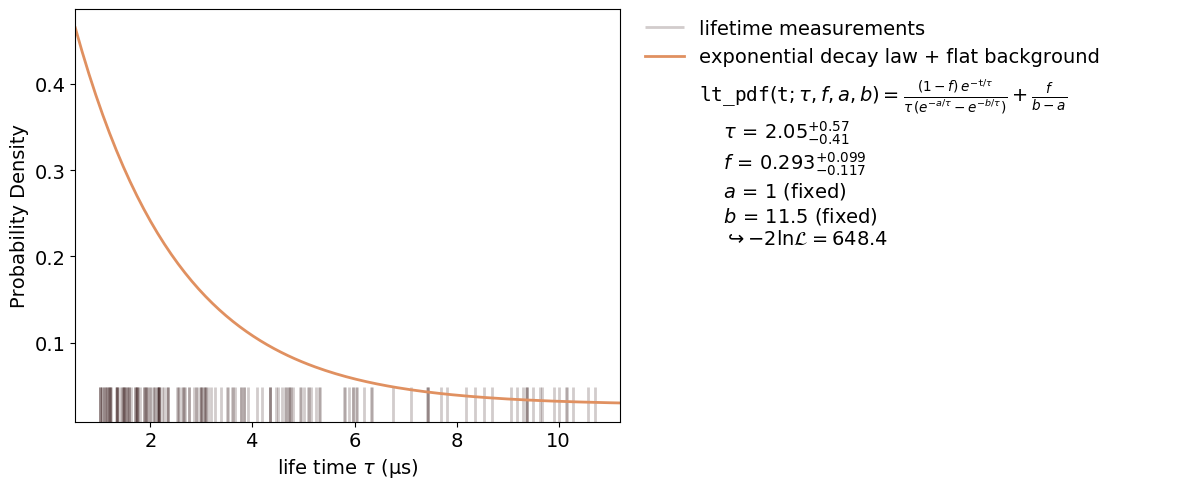

In [11]:
from kafe2.fit import UnbinnedContainer

lt_data = UnbinnedContainer(dT)  # create the kafe data object
lt_data.label = 'lifetime measurements'
lt_data.axis_labels = ['life time $\\tau$ (µs)', 'Probability Density']

# create the fit object and set the pdf for the fit
lt_fit = Fit(data=lt_data, model_function=lt_pdf)

# Fix the parameters a and b.
# Those are responsible for the normalization of the pdf for the range (a, b).
lt_fit.fix_parameter("a", 1)
lt_fit.fix_parameter("b", 11.5)
# constrain parameter fbg to avoid unphysical region
lt_fit.limit_parameter("fbg", 0., 1.)

# assign latex names for the parameters for nicer display
lt_fit.model_label = "exponential decay law + flat background"
lt_fit.assign_parameter_latex_names(tau=r'\tau', fbg='f', a='a', b='b')
# assign a latex expression for the fit function for nicer display
lt_fit.assign_model_function_latex_expression("\\frac{{ (1-{fbg}) \\, e^{{-{t}/{tau}}} }}"
                                           "{{{tau} \\, (e^{{-{a}/{tau}}}-e^{{-{b}/{tau}}}) }}"
                                           "+ \\frac{{ {fbg}}} {{{b}-{a}}}")
lt_fit.do_fit()  # perform the fit

#lt_fit.report(asymmetric_parameter_errors=True)  # print a fit report to the terminal

lt_plot = Plot(lt_fit)  # create a plot object
lt_plot.plot(fit_info=True, asymmetric_parameter_errors=True)  # plot the data and the fit

# Optional: create contours & profile
lt_cpf = ContoursProfiler(lt_fit, profile_subtract_min=False)
# Optional: plot the contour matrix for tau and fbg
lt_cpf.plot_profiles_contours_matrix(parameters=['tau', 'fbg'])

plt.show()

---

# Section 5: Multiple fits with common parameters

It is quite common that a parameter of interest depends on other parameters, which are 
determined in an auxiliary measurement. One possibility to deal with
such situations is to perform a common fit - the main and the auxiliary one - at the same
time, a "MultiFit", as they are called in *kafe2*. 

Another use case of multi-fits arises when the same signal is measured under varying 
conditions, e.g. in different detector regions with different resolutions and background
conditions.

The first case is shown in the *kafe2* jupyter totorial (Example 8), the second one
is explained here.


### 5.1 Multifit of a Gaussian signal from two measruements with different resloution and background

We start from the earlier example, the distribution of a signal on top of a flat background.
Additional smearing is added to the original data to mimic the finite detector resolution. 
A second, similar data-set at the same position and with the same intrinsic width is generated, albeit with a differing number of signal events, a smaller signal fraction and less resolution 
semaring. This is done by the code snippet in the cell below.

In [ ]:
# Generate two data sets with different numbes of events, resolution smearings and signal fractions

# apply resolution smearing to data set SplusB_data 
r1 = 2*width  # smearing twice as large as natural width
SplusB_data1 = SplusB_data + np.random.normal(loc=0., scale=r1, size=len(SplusB_data))

# generate a second data set at the same position and width, 
# but with smaller signal fraction, better resolution and more events 
s2 = 0.25
N2 = 500
r2 = width/3.
SplusB_raw2 = generate_data(N2, min, max, pos, width, s2)  
SplusB_data2 = SplusB_raw2 + np.random.normal(loc=0., scale=r2, size=len(SplusB_raw2))


The fit functions of the two fits are given in the cell below. Note that for parameters which
are different in the two data sets different names must be chosen, here $res1$ and $sf1$ resp. 
$res2$ and $sf2$. This implies that we also have to use two model functions.

In [ ]:
def SplusBmodel1(x, mu = 5., width = 0.3, res1 = 0.3, sf1=0.5):
  '''pdf of a Gaussian signal at position mu, with natural width width,
     resolution res1 and signal fraction sf1 on a flat background
  '''
  sigma2 = width * width + res1 * res1
  normal = np.exp(-0.5 * (x - mu)**2 / sigma2) / np.sqrt(2.0 * np.pi * sigma2)
  flat = 1./(max-min) 
  return sf1 * normal + (1-sf1) * flat

def SplusBmodel2(x, mu = 5., width = 0.3, res2 = 0.3, sf2=0.5):
  '''pdf of a Gaussian signal at position mu, with natural width width,
     resolution res2 and signal fraction sf2 on a flat background
  '''
  sigma2 = width * width + res2 * res2
  normal = np.exp(-0.5 * (x - mu)**2 / sigma2) / np.sqrt(2.0 * np.pi * sigma2)
  flat = 1./(max-min) 
  return sf2 * normal + (1-sf2) * flat                          

Fitting these models will not work yet, because the two components forming the total width are
ambiguous. Later in the fit we must therefore use some constaints, i.e. "external" knowledge on 
the values and uncertainties of the detector resolution in the two cases. 

Setting up the multifit and exectuting it works as follows:

In [ ]:
'''Perform a simultaneous fit to two binned distributions 
   with common parameters with kafe2.MultiFit()
'''
from kafe2 import MultiFit
# Create histogram containers from the two datasets
SplusB_histogram1 = HistContainer(n_bins=30, bin_range=(min, max), fill_data = SplusB_data1)
SplusB_histogram2 = HistContainer(n_bins=50, bin_range=(min, max), fill_data = SplusB_data2)

# create Fit objects by specifying their density functions with corresponding parameters
hist_fit1 = Fit(data=SplusB_histogram1, model_function=SplusBmodel1)
hist_fit2 = Fit(data=SplusB_histogram2, model_function=SplusBmodel2)
# to make the fit unambiguous, external knowledge on the resolutions must be applied
hist_fit1.add_parameter_constraint(name='res1', value = r1, uncertainty = r1/3.)
hist_fit2.add_parameter_constraint(name='res2', value = r2, uncertainty = r2/2.)

# combine the two fits to a MultiFit
multi_fit = MultiFit( fit_list=[hist_fit1, hist_fit2] )

multi_fit.do_fit()  # do the fit
#multi_fit.report()  # Optional: print a report to the terminal

# Optional: create ouput graphics
multi_plot = Plot(multi_fit, separate_figures=True)
multi_plot.plot(asymmetric_parameter_errors=True)
plt.show()


As can be seen, the values of the position of the peak and its natural widh are determined 
by a simultaneous fit to two very different distributions. It is worth mentioning that,
as an alternative, two separate fits could have been performed and the results combined 
using "error propagation by hand".

---

# Concluding remarks

I hope you found the advanced examples of fitting models to data with *kafe2*
informative, useful and enlightening. The code may serve as the basis for your
own work. 

In case you find any problems with *kafe2*, have ideas about missing features or
want to contribute own developments, get in contact with the  authors on the 
[*kaf2 home page on github*](https://github.com/dsavoiu/kafe2/) and open an issue.
